In [ ]:

!pip install kagglehub

In [ ]:
import kagglehub
path=kagglehub.dataset_download("sobhanmoosavi/us-accidents")
print("Dataset downloaded at:", path)

100%|██████████| 653M/653M [00:03<00:00, 184MB/s]

Extracting files...


Dataset downloaded at: /root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13


In [ ]:
import os
os.listdir(path)


['US_Accidents_March23.csv']

In [ ]:
import pandas as pd
USE_SAMPLE=True
SAMPLE_FRAC=0.1
df=pd.read_csv(path+'/US_Accidents_March23.csv')

if USE_SAMPLE:
    df = df.sample(frac=SAMPLE_FRAC, random_state=42).reset_index(drop=True)

print(f"Original shape of DataFrame: {df.shape}")

# Check for missing values in 'Start_Lat' and 'Start_Lng'
print("Missing values before dropping:")
print(df[['Start_Lat', 'Start_Lng']].isnull().sum())

# Drop rows with missing values in 'Start_Lat' or 'Start_Lng'
df.dropna(subset=['Start_Lat', 'Start_Lng'], inplace=True)

# Print the new shape of the DataFrame
print(f"Shape of DataFrame after dropping rows with missing coordinates: {df.shape}")

# Display the first 5 rows of the coordinate columns to verify
print("Sample of 'Start_Lat' and 'Start_Lng' after cleaning:")
print(df[['Start_Lat', 'Start_Lng']].head())

Original shape of DataFrame: (772839, 46)
Missing values before dropping:
Start_Lat    0
Start_Lng    0
dtype: int64
Shape of DataFrame after dropping rows with missing coordinates: (772839, 46)
Sample of 'Start_Lat' and 'Start_Lng' after cleaning:
   Start_Lat   Start_Lng
0  26.706900  -80.119360
1  38.781024 -121.265820
2  33.985249  -84.269348
3  47.118706 -122.556908
4  33.451355 -111.890343


Q1. Spatial Distribution and Hotspots
Question:
Where are the major spatial hotspots of road accidents in the United States, and how do they differ across states and cities?

Tasks
Map accident locations using latitude and longitude to visualize overall spatial distribution (e.g., point map, heatmap, or coarse grid density map).
Identify and list the top states and top cities by accident count and compare them using plots or summary tables.
Highlight at least two clear hotspot regions and briefly interpret possible reasons (e.g., urbanization, highways, population density) using the spatial patterns observed.

In [ ]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 3.8 MB/s eta 0:00:00


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [ ]:
df_geo = df[['Start_Lat', 'Start_Lng', 'State', 'City']].dropna()
# Sample data to speed up (optional for large dataset)
df_sample = df_geo.sample(frac=0.05, random_state=42)

m = folium.Map(location=[39.5, -98.35], zoom_start=4)

HeatMap(
    data=list(zip(df_sample['Start_Lat'], df_sample['Start_Lng'])),
    radius=6
).add_to(m)

m


In [ ]:
state_counts = df_geo['State'].value_counts().head(10)
state_counts


,count
State,
CA,173587
FL,87284
TX,58139
SC,38511
NY,34489
NC,34152
VA,30534
PA,29706
MN,19317


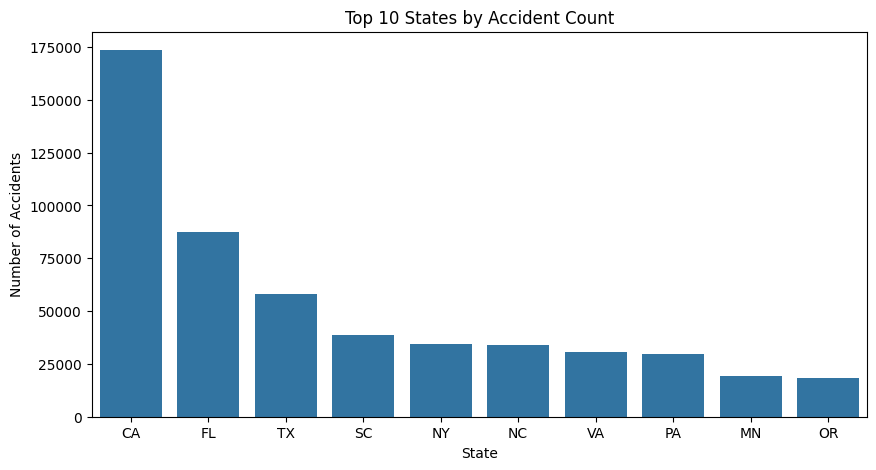

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title("Top 10 States by Accident Count")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


In [ ]:
city_counts = df_geo['City'].value_counts().head(10)
city_counts


,count
City,
Miami,18525
Houston,16937
Los Angeles,15628
Charlotte,14036
Dallas,13146
Orlando,10995
Austin,9715
Raleigh,8622
Nashville,7425


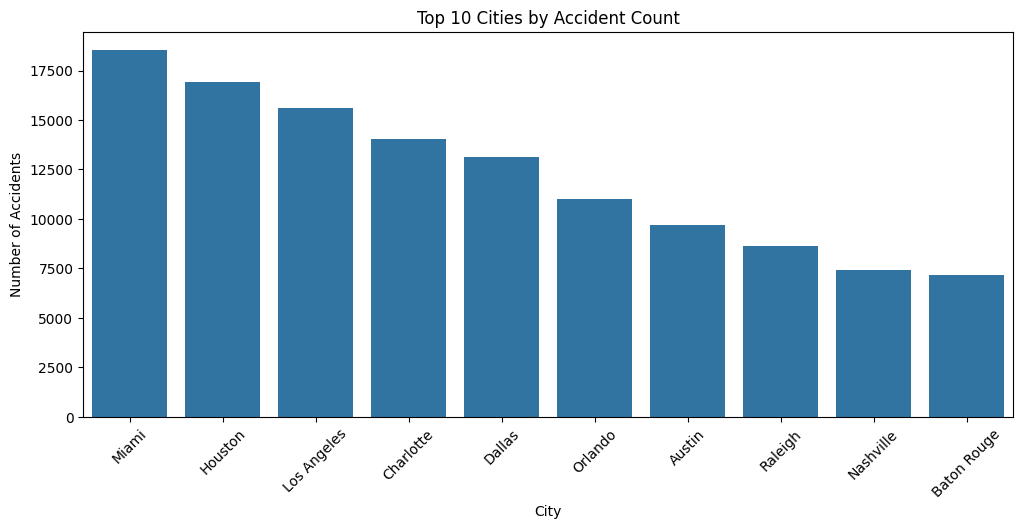

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Accident Count")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.show()


In [ ]:
summary = pd.DataFrame({
    "Top States": state_counts,
    "Top Cities": city_counts
})

summary


,Top States,Top Cities
Austin,NaN,9715.0
Baton Rouge,NaN,7175.0
CA,173587.0,NaN
Charlotte,NaN,14036.0
Dallas,NaN,13146.0
FL,87284.0,NaN
Houston,NaN,16937.0
Los Angeles,NaN,15628.0
MN,19317.0,NaN
Miami,NaN,18525.0


Q2. Spatial–Temporal Patterns within a State

Question:
How do accident patterns vary by time of day and month within a specific high-accident state (e.g., CA or TX), and are these patterns spatially concentrated?

Tasks
Choose one state with a high number of accidents and create hourly and monthly distributions of accidents (bar plots).
Overlay or compare these distributions with maps for selected hours (e.g., peak vs off-peak) or seasons (e.g., winter vs summer) to see whether certain locations within the state become more active at specific times.
Describe any spatial–temporal clusters you observe (e.g., urban cores at rush hour, specific corridors in certain months).

[ ]


In [ ]:
state_df = df[df['State'] == 'CA'].copy()
state_df['Start_Time'] = pd.to_datetime(
    state_df['Start_Time'],
    errors='coerce'
)

state_df['Hour'] = state_df['Start_Time'].dt.hour
state_df['Month'] = state_df['Start_Time'].dt.month


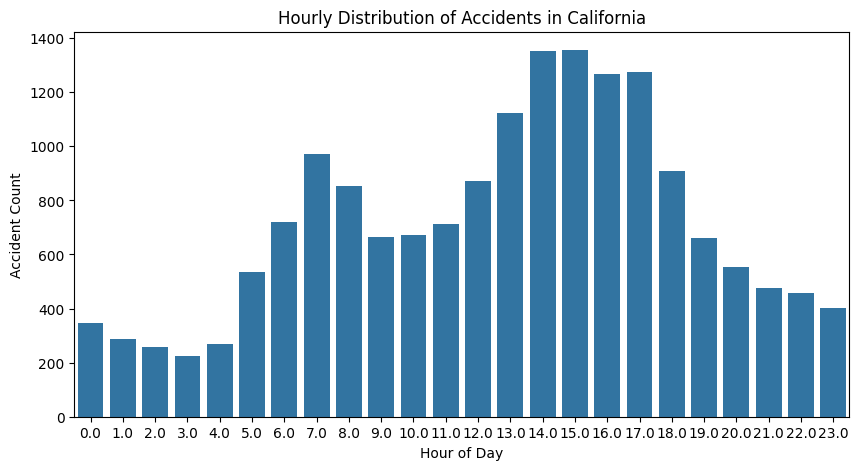

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=state_df)
plt.title("Hourly Distribution of Accidents in California")
plt.xlabel("Hour of Day")
plt.ylabel("Accident Count")
plt.show()


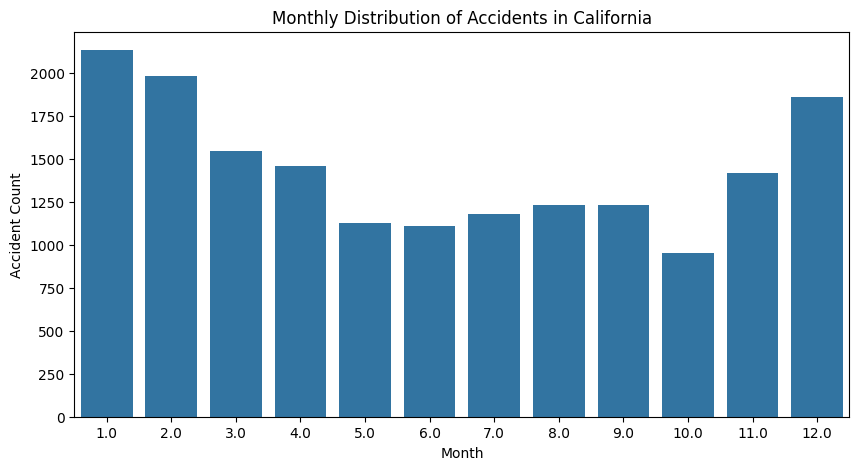

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', data=state_df)
plt.title("Monthly Distribution of Accidents in California")
plt.xlabel("Month")
plt.ylabel("Accident Count")
plt.show()


In [ ]:
peak_hours = state_df[state_df['Hour'].between(7, 9)]
off_peak_hours = state_df[state_df['Hour'].between(1, 4)]


In [ ]:
m1 = folium.Map(location=[36.5, -119.5], zoom_start=6)

HeatMap(
    data=list(zip(peak_hours['Start_Lat'], peak_hours['Start_Lng'])),
    radius=6
).add_to(m1)

m1


In [ ]:
m2 = folium.Map(location=[36.5, -119.5], zoom_start=6)

HeatMap(
    data=list(zip(off_peak_hours['Start_Lat'], off_peak_hours['Start_Lng'])),
    radius=6
).add_to(m2)

m2


In [ ]:
winter = state_df[state_df['Month'].isin([12,1,2])]
summer = state_df[state_df['Month'].isin([6,7,8])]


In [ ]:
m3 = folium.Map(location=[36.5, -119.5], zoom_start=6)
HeatMap(list(zip(winter['Start_Lat'], winter['Start_Lng']))).add_to(m3)
m3


In [ ]:
m4 = folium.Map(location=[36.5, -119.5], zoom_start=6)
HeatMap(list(zip(summer['Start_Lat'], summer['Start_Lng']))).add_to(m4)
m4


In [ ]:
df_geo = df[['Start_Lat','Start_Lng','Severity','State','City',
             'Weather_Condition','Junction','Crossing','Traffic_Signal']].dropna(subset=['Start_Lat','Start_Lng','Severity'])


In [ ]:
df_sample = df_geo.sample(frac=0.03, random_state=42)
high_severity = df_sample[df_sample['Severity'] >= 3]

m = folium.Map(location=[39.5, -98.35], zoom_start=4)

HeatMap(
    data=list(zip(high_severity['Start_Lat'], high_severity['Start_Lng'])),
    radius=7
).add_to(m)

m


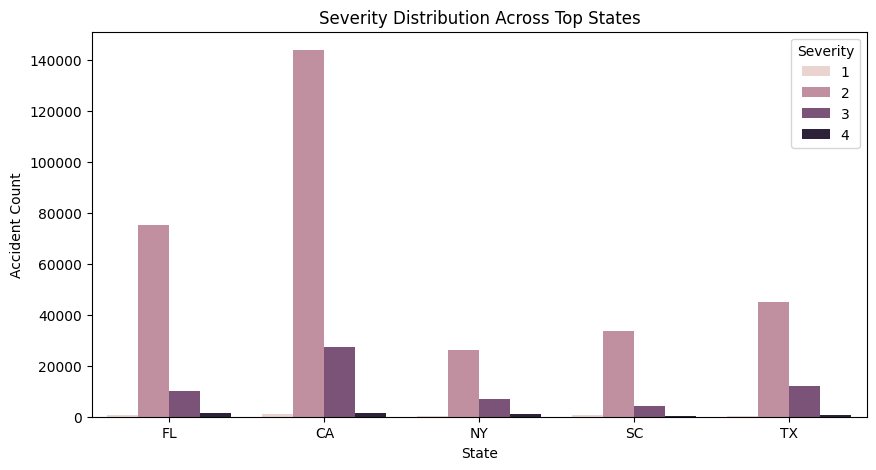

In [ ]:
top_states = df_geo['State'].value_counts().head(5).index
state_severity = df_geo[df_geo['State'].isin(top_states)]

plt.figure(figsize=(10,5))
sns.countplot(data=state_severity, x='State', hue='Severity')
plt.title("Severity Distribution Across Top States")
plt.ylabel("Accident Count")
plt.show()


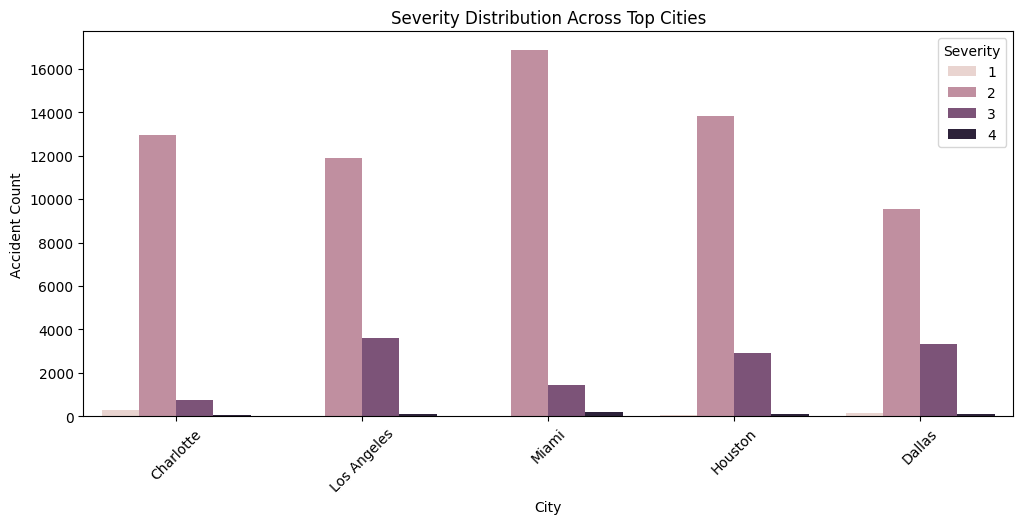

In [ ]:
top_cities = df_geo['City'].value_counts().head(5).index
city_severity = df_geo[df_geo['City'].isin(top_cities)]

plt.figure(figsize=(12,5))
sns.countplot(data=city_severity, x='City', hue='Severity')
plt.xticks(rotation=45)
plt.title("Severity Distribution Across Top Cities")
plt.ylabel("Accident Count")
plt.show()


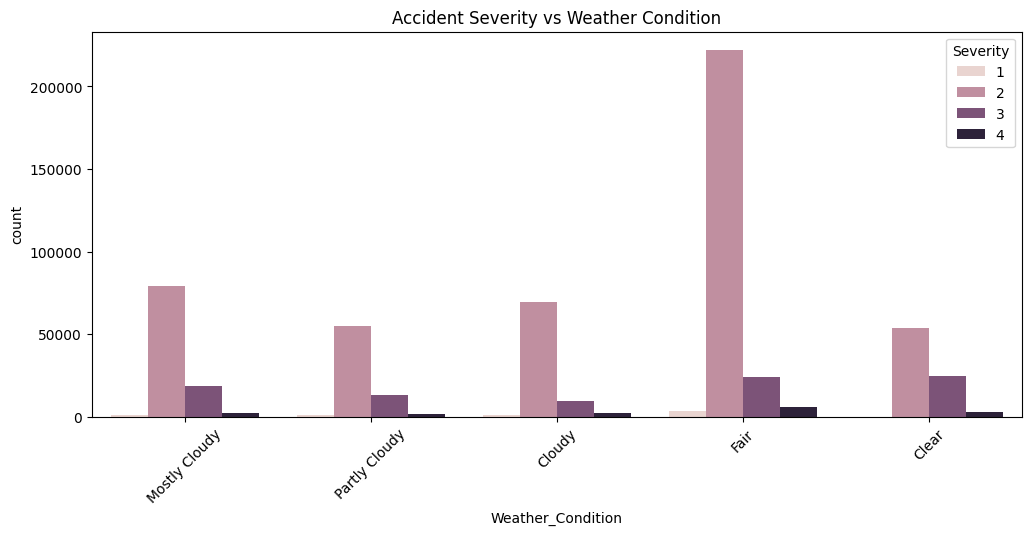

In [ ]:
top_weather = df_geo['Weather_Condition'].value_counts().head(5).index
weather_severity = df_geo[df_geo['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(12,5))
sns.countplot(data=weather_severity, x='Weather_Condition', hue='Severity')
plt.xticks(rotation=45)
plt.title("Accident Severity vs Weather Condition")
plt.show()


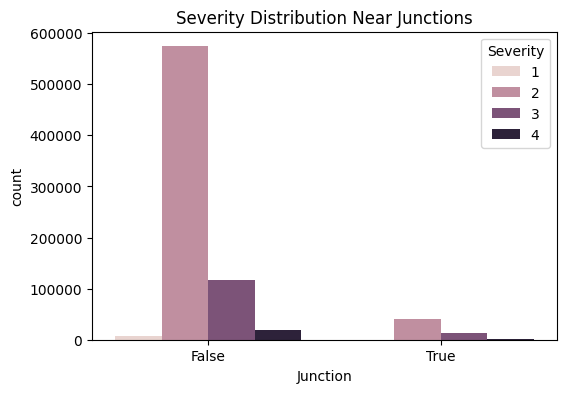

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_geo, x='Junction', hue='Severity')
plt.title("Severity Distribution Near Junctions")
plt.show()


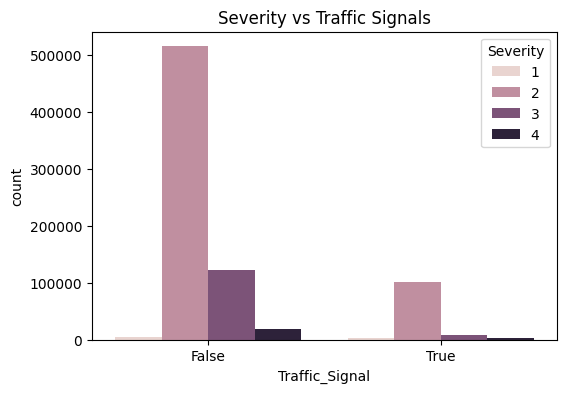

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_geo, x='Traffic_Signal', hue='Severity')
plt.title("Severity vs Traffic Signals")
plt.show()
